# Example of use of ``fft_electronic_spin_density``

In [1]:
from fft_electronic_spin_density.classes import Density
import numpy as np

## Load the density file

In [2]:
density = Density(fname_cube_file='../cube_files/Cu2AC4_rho_sz_256.cube')

da, db, dc [0.06160469 0.         0.        ] [-0.02770984  0.05432322  0.        ] [0.         0.         0.05945465] Angstrom
dka, dkb, dkc [ 0.45329773  0.23122353 -0.        ] [0.         0.53547678 0.        ] [ 0.         -0.          0.73389101] 1/Angstrom
A (Angstrom)
 [[13.86105618  0.          0.        ]
 [-5.98532446 11.7338146   0.        ]
 [ 0.          0.          8.56146919]]

B (1/Angstrom)
 [[101.99198932  52.02529349  -0.        ]
 [  0.         115.6629854    0.        ]
 [  0.          -0.         105.68030608]]


## Visualize as 3D - all 2D slices plotted with transparent zero values

Plotting with transparency near the middle of the colormap: alpha = 0.500 (1 - exp(-(x/sigma)^2) with sigma=0.150)


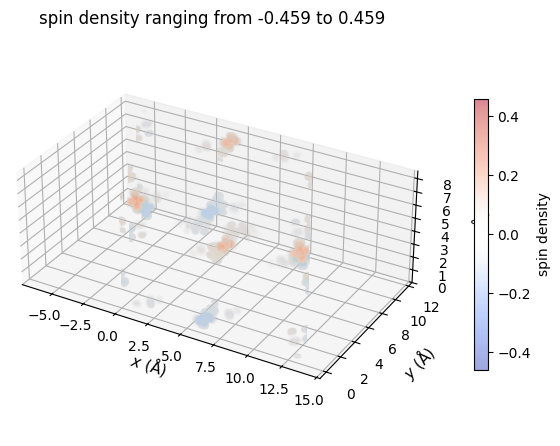

In [ ]:
density.plot_cube_rho_sz(c_idx_arr=np.arange(0, density.nc), fout_name=f'rho_sz_exploded.jpg', alpha=0.05, figsize=(5.5,5.5), dpi=400, zeros_transparent=True,
                    show_plot=True)  # rho_sz_gauss_exploded_all

## Perform FFT, visualize and write out as a .cube file itself

In [4]:
density.FFT()

- by the way, kz_target must be between 0.00 and 105.680306 1/Angstrom
i_kz(52.473207532295795) 71


take_idx 2
[101.99198932  52.02529349  -0.        ] [  0.        115.6629854   0.       ]
(225, 216, 144)
kz at index 72 is 0.000000 1/Angstrom


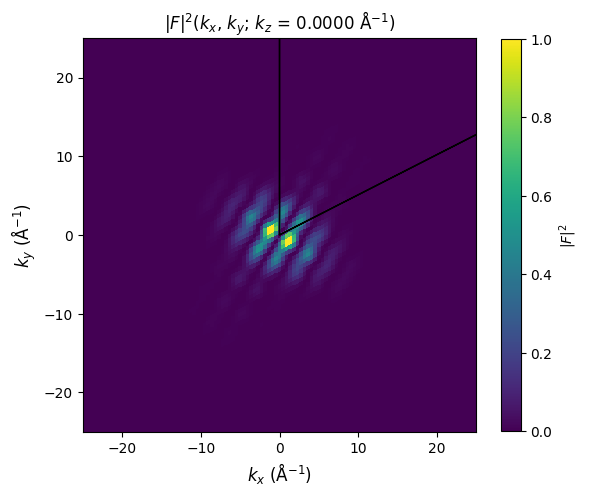

In [11]:
density.plot_fft_2D(i_kz=density.nkc//2,
                    fout_name='fft_2D_kz_0.png',
                    xlims=(-25.0, 25.0),
                    ylims=(-25.0, 25.0),
                    show_plot=True)

## Plot FFT along lines

kx_center before 101.53869159157077
ky_center before 166.92157857928206
MAXIMUM OF FFT 1.6553645587813954
NORMALIZATION FACTOR FFT 4259578.7782559935
take_idx 2
[101.99198932  52.02529349  -0.        ] [  0.        115.6629854   0.       ]
(225, 216, 144)
kz at index 72 is 0.000000 1/Angstrom


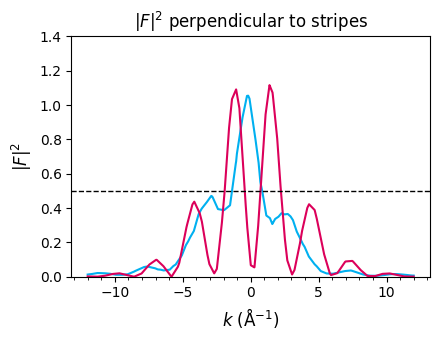

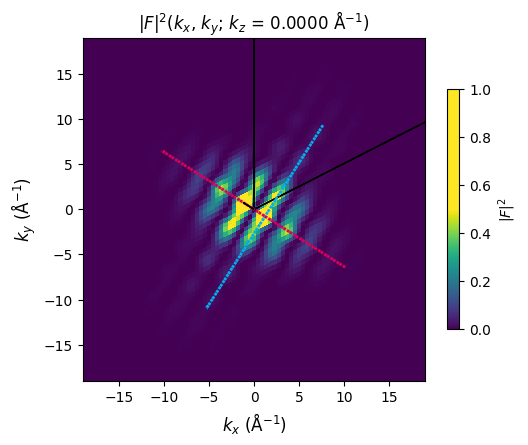

In [ ]:
fft_along_line_data = density.plot_fft_along_line(i_kz=density.nkc//2, cut_along='both', kx_ky_fun=None, k_dist_lim=12, N_points=3001, fout_name=f'cut_1D_both.png', cax_saturation=0.5,)

kx_arr_along, ky_arr_along, F_abs_sq_interp_along, kx_arr_perp, ky_arr_perp, F_abs_sq_interp_perp = fft_along_line_data

density.plot_fft_2D(i_kz=density.nkc//2, fft_as_log=False, 
            fout_name=f'F_abs_sq-scale_kz_at_idx_{density.nkc//2}_cut_both.png', 
            figsize=(5.5, 4.5),
            dpi=400,
            fixed_z_scale=True,
            cax_saturation=0.5,
            xlims=[-19, 19],
            ylims=[-19, 19],
            zlims=[0, 1.6e6],
            plot_line_cut=True, kx_arr_along=kx_arr_along, ky_arr_along=ky_arr_along,
            kx_arr_perp=kx_arr_perp, ky_arr_perp=ky_arr_perp,
            cut_along='both')

## Plot FFT in 3D

Plotting with transparency everywhere except around largest values: alpha = 0.500 exp(-((1-x)/sigma)^3) with sigma=0.250)


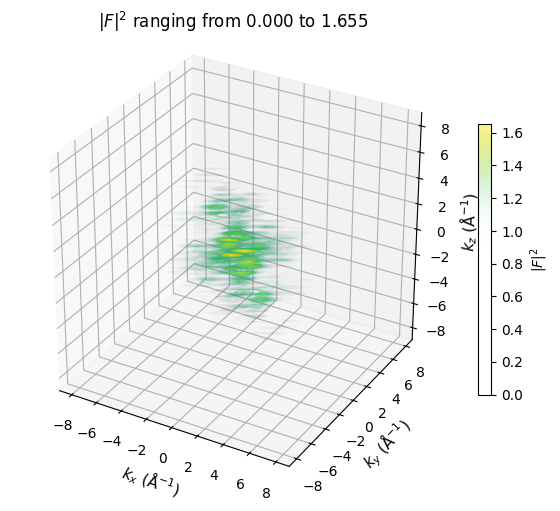

In [18]:
c_idx_array = np.arange(0, density.nc, 1)
xlims = [-9, 9]
ylims = xlims
zlims = xlims
density.plot_cube_fft(c_idx_arr=c_idx_array, fout_name=f'F_abs_sq_all.png', figsize=(5.5,5.5), dpi=400, zeros_transparent=True,
                        xlims=xlims, ylims=ylims, zlims=zlims, show_plot=False)

## Filter out density except around selected sites

In [ ]:
site_idx = [0, 1] # atom 0 - Cu0, atom 1 - Cu1
site_radii = [1.1]*2 # Angstrom
site_centers = density.get_sites_of_atoms(site_idx)

density.mask_except_sites(leave_sites={'site_centers':site_centers, 'site_radii':site_radii})

site_centers [(np.float64(4.859910583915042), np.float64(5.280914447434058), np.float64(3.5615838230351273)), (np.float64(3.015710013144043), np.float64(6.452886390689119), np.float64(4.999916056863089))]


Plotting with transparency near the middle of the colormap: alpha = 0.500 (1 - exp(-(x/sigma)^2) with sigma=0.150)


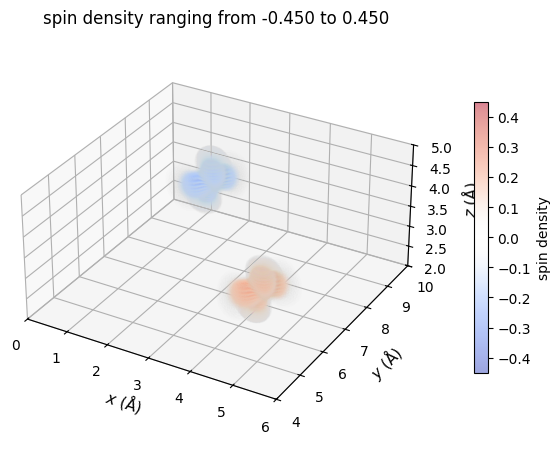

In [29]:
density.plot_cube_rho_sz(c_idx_arr=np.arange(0, density.nc, 1), fout_name=f'rho_sz_exploded_filtered.jpg', alpha=0.05, figsize=(5.5,5.5), dpi=400, zeros_transparent=True,
                    show_plot=True,
                    xlims=[0, 6], 
                    ylims=[4,10],
                    zlims=[2,5])  # rho_sz_gauss_exploded_all

## Replace by model

In [50]:
site_idx = [0, 1]

parameters_model = {'type':['dx2y2_neat']*2, 
                    'sigmas':[None]*2, 
                    'centers':density.get_sites_of_atoms(site_idx),
                    'spin_down_orbital_all':[False, True],
                    'fit_params_init_all':{
                        'amplitude':[0.360453056, 0.360453056], 
                        'theta0':[-1.011437, -1.011437,], 
                        'phi0':[-0.59855408, -0.59855408,], 
                        'Z_eff':[12.8481725, 12.8481725,],
                        'C':[0.000, 0.000,]}}

density.replace_by_model(fit=False, parameters=parameters_model)

In [ ]:
density.plot_cube_rho_sz(c_idx_arr=np.arange(0, density.nc, 1), fout_name=f'rho_sz_exploded_model.jpg', alpha=0.05, figsize=(5.5,5.5), dpi=400, zeros_transparent=True,
                    show_plot=True,
                    xlims=[0, 6], 
                    ylims=[4,10],
                    zlims=[2,5])  # rho_sz_gauss_exploded_all

SyntaxError: keyword argument repeated: show_plot (3275417356.py, line 6)

## Fit a model

In [ ]:
site_idx = [0, 1]

parameters_model = {'type':['dx2y2_neat']*2, 
                    'sigmas':[None]*2, 
                    'centers':density.get_sites_of_atoms(site_idx),
                    'spin_down_orbital_all':[False, True],
                    'fit_params_init_all':{
                        'amplitude':[0.360453056, 0.360453056], 
                        'theta0':[-1.011437, -1.011437,], 
                        'phi0':[-0.59855408, -0.59855408,], 
                        'Z_eff':[12.8481725, 12.8481725,],
                        'C':[0.000, 0.000,]}}

density.replace_by_model(fit=True, parameters=parameters_model)

## Write out .cube file to be visualized in VESTA

In [6]:
density.write_cube_file_fft(fout='fft_rho_sz.cube')

# Integrate the density in the unit cell

In [7]:
rho_tot_unitcell, rho_abs_tot_unitcell = density.integrate_cube_file(verbose=False)

print(f"""Total charge in the unit cell {rho_tot_unitcell:.4f} e.
Total absolute charge in the unit cell {rho_abs_tot_unitcell:.4f} e.""")

Total charge in the unit cell 0.0000 e.
Total absolute charge in the unit cell 8.1414 e.


## Visualize the density as 2D slices
- plot density cuts at z=0.0 Angstrom and at the z position of atom 0

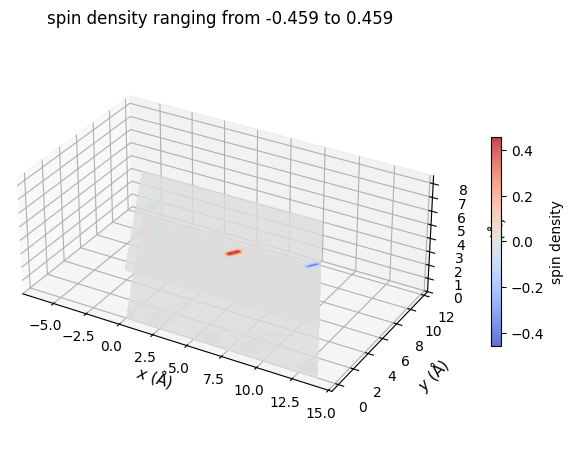

In [8]:
site_coordinates = density.get_sites_of_atoms(site_idx=[0])
# z position of atom 0
atom_0_z_coordinate = site_coordinates[0][2]

# indices along the c lattice vector where density cuts should be plotted
c_idx = density.get_c_idx_at_z_coordinates(z_coordinates=[0.0, atom_0_z_coordinate])

density.plot_cube_rho_sz(c_idx_arr=c_idx, fout_name=f'plot_2D_example_figure.png', alpha=0.8, 
                         figsize=(6.0, 4.5), dpi=400, zeros_transparent=False,
                         show_plot=True)